In [502]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [503]:
df= pd.read_excel("Survey_Data.xlsx")

In [504]:
df.head()

,Timestamp,Gender,Age,what is your home state,what is your local government area(LGA),what was the location of your secondary school?(name of town or city),Latitude,Longitude,How many times did you attempt JAMB before gaining admission?,Did you have to relocate from your home state to attend the University of Ilorin?,What is the approximate distance between your home and the University of Ilorin?,What is your estimated annual tuition and school-related expenses?,How do you fund your university education?,Have you ever had to defer a semester due to financial difficulties?,What challenges do you face in accessing learning materials?,Does your department have adequate classrooms and lecture halls?,Do you have access to a stable power supply for studying?,Do you believe students from rural areas face more difficulties accessing university education than urban students?,What do you think is the biggest barrier to university education in Nigeria?
0,2025-03-28 16:17:02.912,Male,23-27,Ogun state,Owode,Gbagada,6.5495°N,3.3926°E,Third attempt,Yes,201-500km,"₦100,000 – ₦200,000",Parental support,No,Expensive textbooks,Yes,Most of the time,Strongly agree,Limited admission slots
1,2025-03-28 16:17:34.799,Female,23-27,Lagos,Eti-osa,"Osborne, ikoyi. Lagos",6.4625°N,3.4099°E,Second attempt,Yes,50-200km,"₦201,000 – ₦300,000",Parental support,No,Expensive textbooks,No,Never,Agree,High tuition and expenses
2,2025-03-28 16:20:02.913,Female,23-27,Lagos,Alimosho,Ikotun,6.5423°N,3.2730°E,More than three attempts,Yes,More than 500km,"Above ₦300,000",Scholarships/grants,No,"Poor internet access, Expensive textbooks, Lac...",Yes,Never,Strongly agree,High tuition and expenses
3,2025-03-28 16:29:23.309,Male,23-27,Imo,aboh-mbise,Lagos,6.5244°N,3.3792°E,Second attempt,Yes,More than 500km,"Above ₦300,000",Scholarships/grants,No,Poor internet access,No,Most of the time,Strongly agree,High tuition and expenses
4,2025-03-28 16:31:12.443,Male,23-27,Kogi,Ajeokuta,Gwawalada,8.9410°N,7.0811°E,First attempt,Yes,201-500km,"Above ₦300,000",Parental support,No,No challenges,Yes,Most of the time,Strongly agree,High tuition and expenses


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 19 columns):
 #   Column                                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                                --------------  -----         
 0   Timestamp                                                                                                             151 non-null    datetime64[ns]
 1   Gender                                                                                                                151 non-null    object        
 2   Age                                                                                                                   151 non-null    object        
 3   what is your home state                                                                                               15

In [506]:
# Function to clean longitude and latitude
def clean_coordinates(coord_series):
    return coord_series.str.replace('°', '', regex=True).str.replace('N', '', regex=True).str.replace('E', '', regex=True)

# Apply to longitude and latitude columns
df["Latitude"] = clean_coordinates(df["Latitude"])
df["Longitude"] = clean_coordinates(df["Longitude"])


In [507]:
# Verify cleaning
print(df[["Longitude", "Latitude"]].head())
print(df.dtypes)  # Ensure they are float


  Longitude Latitude
0    3.3926   6.5495
1    3.4099   6.4625
2    3.2730   6.5423
3    3.3792   6.5244
4    7.0811   8.9410
Timestamp                                                                                                               datetime64[ns]
Gender                                                                                                                          object
Age                                                                                                                             object
what is your home state                                                                                                         object
what is your local government area(LGA)                                                                                         object
what was the location of your secondary school?(name of town or city)                                                           object
Latitude                                                        

In [508]:
df['Latitude'] = df['Latitude'].astype(float)

In [509]:
df['Longitude'] = df['Longitude'].astype(float)

Timestamp                                                                                                               0
Gender                                                                                                                  0
Age                                                                                                                     0
what is your home state                                                                                                 0
what is your local government area(LGA)                                                                                 0
what was the location of your secondary school?(name of town or city)                                                   0
Latitude                                                                                                                0
Longitude                                                                                                               0
How many times did you a

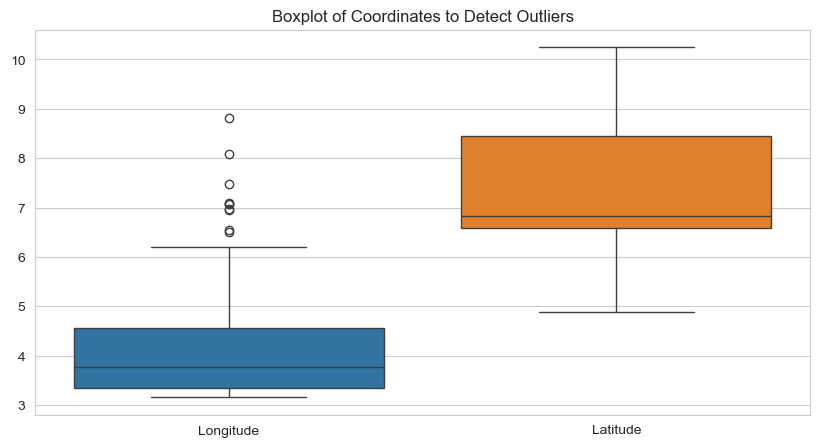

In [ ]:
# Check for missing values
df.isnull().sum()


In [ ]:

# Check for outliers in numerical columns


plt.figure(figsize=(10,5))
sns.boxplot(data=df[["Longitude", "Latitude"]])
plt.title("Boxplot of Coordinates to Detect Outliers")
plt.show()


In [511]:
# Define the IQR range for longitude
Q1 = df["Longitude"].quantile(0.25)
Q3 = df["Longitude"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df[(df["Longitude"] < lower_bound) | (df["Longitude"] > upper_bound)]
print(outliers)


                  Timestamp  Gender       Age what is your home state   \
4   2025-03-28 16:31:12.443    Male     23-27                     Kogi   
6   2025-03-28 16:34:54.550  Female     18-22                    Kwara   
38  2025-03-28 17:29:07.069    Male     18-22                      FCT   
39  2025-03-28 17:30:55.585    Male  Under 18                    Delta   
56  2025-03-28 19:44:25.019    Male     18-22                    Kwara   
97  2025-03-29 10:23:41.718    Male     23-27                      Imo   
123 2025-03-29 16:11:24.169    Male     23-27                    Enugu   
124 2025-03-29 16:13:08.672    Male     23-27                   Rivers   
146 2025-03-30 07:08:05.417    Male     23-27                     FCT    
149 2025-03-30 07:12:28.667  Female     23-27                 Plateau    

    what is your local government area(LGA)  \
4                                  Ajeokuta   
6                                   Oke ero   
38                                     Karu 

In [512]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd


In [513]:
import folium
from folium.plugins import MarkerCluster
from branca.element import Template, MacroElement
import pandas as pd



# Create the map centered around University of Ilorin
m = folium.Map(location=[8.4799, 4.5418], zoom_start=6)

# Add a marker for University of Ilorin
folium.Marker(
    location=[8.4799, 4.5418],
    popup="University of Ilorin",
    icon=folium.Icon(color='red', icon='graduation-cap')
).add_to(m)

# Add markers for student locations
marker_cluster = MarkerCluster().add_to(m)
for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["what was the location of your secondary school?(name of town or city)"],
        icon=folium.Icon(color='blue', icon='user')
    ).add_to(marker_cluster)

# Custom legend template
legend_html = """
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 200px;
    background-color: white;
    z-index:9999;
    padding: 10px;
    border-radius: 5px;
    box-shadow: 2px 2px 5px rgba(0,0,0,0.3);
    font-size: 14px;
">
    <b>Legend</b><br>
    <i class="fa fa-map-marker fa-2x" style="color:red"></i> University of Ilorin<br>
    <i class="fa fa-map-marker fa-2x" style="color:blue"></i> Student Locations<br>
</div>
"""

legend = MacroElement()
legend._template = Template(legend_html)
m.get_root().add_child(legend)

# Show map
m.save("student_map_with_legend.html")
m


In [514]:


# 1. Fix Abakaliki coordinates (convert to negative longitude if confirmed to be west)
df.loc[df['what was the location of your secondary school?(name of town or city)'].str.contains('Abakaliki', case=False, na=False), 
       'Longitude'] = -8.0763  # Use 8.0763 if confirmed East

# 2. Adjust Port Harcourt coordinates (approximate correct location)
df.loc[df['what was the location of your secondary school?(name of town or city)'].str.contains('port harcourt', case=False, na=False), 
       ['Latitude', 'Longitude']] = [4.8156, 7.0498]  # Central PH coordinates

# 3. Verify Jengre (no automatic fix - flag for review)
jengre_mask = df['what was the location of your secondary school?(name of town or city)'].str.contains('Jengre', case=False, na=False)
print("Rows needing manual verification for Jengre:")
print(df[jengre_mask][['what was the location of your secondary school?(name of town or city)', 'Latitude', 'Longitude']])

# 4. Correct Gwawalada to Gwagwalada
df['what was the location of your secondary school?(name of town or city)'] = df['what was the location of your secondary school?(name of town or city)'].str.replace('Gwawalada', 'Gwagwalada', case=False)

# Save corrected dataset
df.to_csv("corrected_schools.csv", index=False)
print("Corrections applied and saved")

Rows needing manual verification for Jengre:
    what was the location of your secondary school?(name of town or city)  \
149                                            Jengre                       

     Latitude  Longitude  
149   10.2452     8.8105  
Corrections applied and saved


In [515]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'what is your home state ',
       'what is your local government area(LGA)',
       'what was the location of your secondary school?(name of town or city)',
       'Latitude', 'Longitude',
       'How many times did you attempt JAMB before gaining admission?',
       'Did you have to relocate from your home state to attend the University of Ilorin? ',
       'What is the approximate distance between your home and the University of Ilorin?  ',
       'What is your estimated annual tuition and school-related expenses? ',
       'How do you fund your university education? ',
       'Have you ever had to defer a semester due to financial difficulties? ',
       'What challenges do you face in accessing learning materials?  ',
       'Does your department have adequate classrooms and lecture halls? ',
       'Do you have access to a stable power supply for studying?  ',
       'Do you believe students from rural areas face more difficulties accessing un

In [516]:
import pandas as pd


# Mapping dictionary for conversion
distance_map = {
    "Less then 50km": 25,
    "50-200km": 125,
    "201-500km": 350,
    "More than 500km": 600
}


In [517]:

# Apply mapping to the Distance column
df["Distance_to_uni"] = df["What is the approximate distance between your home and the University of Ilorin?  "].map(distance_map)

# Convert to numeric type
df["Distance_to_uni"] = pd.to_numeric(df["Distance_to_uni"])

df.head()


,Timestamp,Gender,Age,what is your home state,what is your local government area(LGA),what was the location of your secondary school?(name of town or city),Latitude,Longitude,How many times did you attempt JAMB before gaining admission?,Did you have to relocate from your home state to attend the University of Ilorin?,What is the approximate distance between your home and the University of Ilorin?,What is your estimated annual tuition and school-related expenses?,How do you fund your university education?,Have you ever had to defer a semester due to financial difficulties?,What challenges do you face in accessing learning materials?,Does your department have adequate classrooms and lecture halls?,Do you have access to a stable power supply for studying?,Do you believe students from rural areas face more difficulties accessing university education than urban students?,What do you think is the biggest barrier to university education in Nigeria?,Distance_to_uni
0,2025-03-28 16:17:02.912,Male,23-27,Ogun state,Owode,Gbagada,6.5495,3.3926,Third attempt,Yes,201-500km,"₦100,000 – ₦200,000",Parental support,No,Expensive textbooks,Yes,Most of the time,Strongly agree,Limited admission slots,350.0
1,2025-03-28 16:17:34.799,Female,23-27,Lagos,Eti-osa,"Osborne, ikoyi. Lagos",6.4625,3.4099,Second attempt,Yes,50-200km,"₦201,000 – ₦300,000",Parental support,No,Expensive textbooks,No,Never,Agree,High tuition and expenses,125.0
2,2025-03-28 16:20:02.913,Female,23-27,Lagos,Alimosho,Ikotun,6.5423,3.2730,More than three attempts,Yes,More than 500km,"Above ₦300,000",Scholarships/grants,No,"Poor internet access, Expensive textbooks, Lac...",Yes,Never,Strongly agree,High tuition and expenses,600.0
3,2025-03-28 16:29:23.309,Male,23-27,Imo,aboh-mbise,Lagos,6.5244,3.3792,Second attempt,Yes,More than 500km,"Above ₦300,000",Scholarships/grants,No,Poor internet access,No,Most of the time,Strongly agree,High tuition and expenses,600.0
4,2025-03-28 16:31:12.443,Male,23-27,Kogi,Ajeokuta,Gwagwalada,8.9410,7.0811,First attempt,Yes,201-500km,"Above ₦300,000",Parental support,No,No challenges,Yes,Most of the time,Strongly agree,High tuition and expenses,350.0


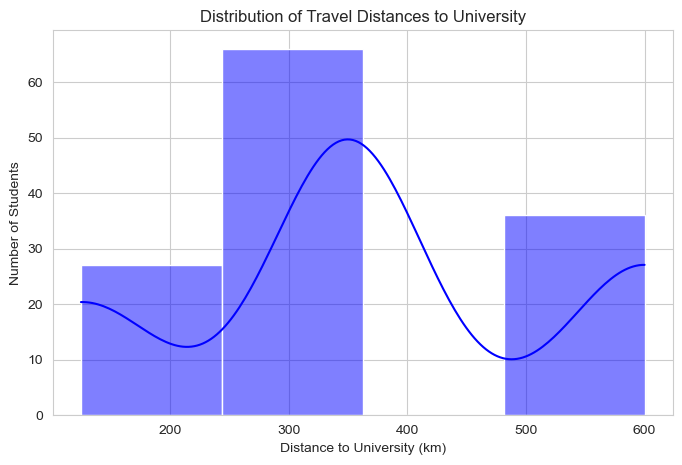

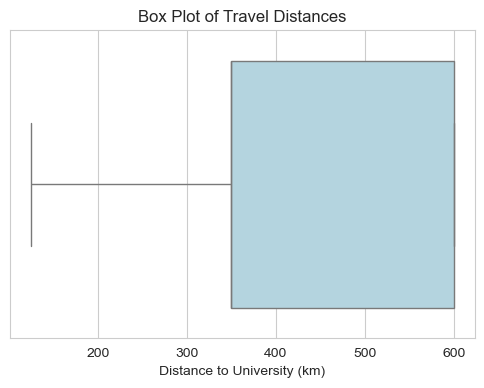

In [518]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_style("whitegrid")

# Histogram of distances
plt.figure(figsize=(8, 5))
sns.histplot(df["Distance_to_uni"], bins=4, kde=True, color="blue")
plt.xlabel("Distance to University (km)")
plt.ylabel("Number of Students")
plt.title("Distribution of Travel Distances to University")
plt.show()

# Box plot to detect outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Distance_to_uni"], color="lightblue")
plt.xlabel("Distance to University (km)")
plt.title("Box Plot of Travel Distances")
plt.show()



In [519]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'what is your home state ',
       'what is your local government area(LGA)',
       'what was the location of your secondary school?(name of town or city)',
       'Latitude', 'Longitude',
       'How many times did you attempt JAMB before gaining admission?',
       'Did you have to relocate from your home state to attend the University of Ilorin? ',
       'What is the approximate distance between your home and the University of Ilorin?  ',
       'What is your estimated annual tuition and school-related expenses? ',
       'How do you fund your university education? ',
       'Have you ever had to defer a semester due to financial difficulties? ',
       'What challenges do you face in accessing learning materials?  ',
       'Does your department have adequate classrooms and lecture halls? ',
       'Do you have access to a stable power supply for studying?  ',
       'Do you believe students from rural areas face more difficulties accessing un

In [520]:
# Standardizing column names for consistency
df.rename(columns={
    'what is your home state ': 'Home_State',
    'what is your local government area(LGA)': 'LGA',
    'what was the location of your secondary school?(name of town or city)': 'Secondary_School_Location',

}, inplace=True)


In [521]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant columns
features = ["Distance_to_uni", "Latitude", "Longitude"]
df_cluster = df[features].dropna()  # Drop rows with missing values

# Standardizing the features for better clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Check preprocessed data
print(scaled_features[:5])  # View first 5 rows after scaling


[[-0.1366731  -0.70540112 -0.35477618]
 [-1.49289082 -0.80540235 -0.34332812]
 [ 1.37023547 -0.71367709 -0.43392004]
 [ 1.37023547 -0.73425205 -0.36364347]
 [-0.1366731   2.04348307  2.08604426]]


In [522]:
import pandas as pd
import numpy as np



# Drop rows with missing latitude/longitude
df_clean = df.dropna(subset=["Latitude", "Longitude"]).copy()

# Ensure latitude & longitude are numeric
df_clean["Latitude"] = pd.to_numeric(df_clean["Latitude"], errors="coerce")
df_clean["Longitude"] = pd.to_numeric(df_clean["Longitude"], errors="coerce")

# Drop any newly created NaN values
df_clean = df_clean.dropna(subset=["Latitude", "Longitude"])

print("Cleaned data shape:", df_clean.shape)


Cleaned data shape: (151, 20)


In [523]:
from sklearn.cluster import KMeans

# Prepare features
features = df_clean[["Latitude", "Longitude"]].values

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(features)

# Display cluster counts
print(df_clean["Cluster"].value_counts())


c:\Users\Abubakar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster
1    88
2    52
0    11
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)  # Adjust eps for better clustering
df_clean["DBSCAN_Cluster"] = dbscan.fit_predict(features)

# Check cluster distribution
print(df_clean["DBSCAN_Cluster"].value_counts())


DBSCAN_Cluster
 0    61
-1    49
 1    32
 2     9
Name: count, dtype: int64


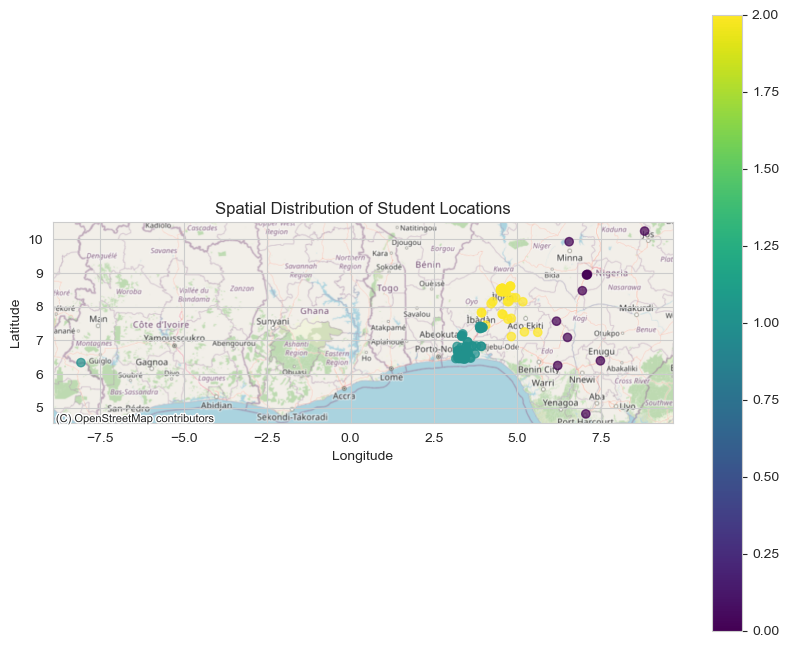

In [525]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df_clean, 
                       geometry=gpd.points_from_xy(df_clean.Longitude, df_clean.Latitude), 
                       crs="EPSG:4326")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot clusters
gdf.plot(ax=ax, column='Cluster', cmap='viridis', legend=True, alpha=0.7)

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Labels and title
ax.set_title("Spatial Distribution of Student Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


In [526]:
dbscan = DBSCAN(eps=0.2, min_samples=5)  # Try 0.2 or 0.3
df_clean["DBSCAN_Cluster"] = dbscan.fit_predict(features)

print(df_clean["DBSCAN_Cluster"].value_counts())


DBSCAN_Cluster
 0    74
-1    35
 1    32
 2    10
Name: count, dtype: int64


In [527]:
from geopy.distance import geodesic

# Define University of Ilorin coordinates
uni_coordinates = (8.4790, 4.6746)

# Compute distances
df_clean["Distance_to_Uni"] = df_clean.apply(lambda row: 
                     geodesic((row["Latitude"], row["Longitude"]), uni_coordinates).km, axis=1)

# Show the first few distances
print(df_clean[["Latitude", "Longitude", "Distance_to_Uni"]].head())


   Latitude  Longitude  Distance_to_Uni
0    6.5495     3.3926       256.034856
1    6.4625     3.4099       263.096183
2    6.5423     3.2730       264.204543
3    6.5244     3.3792       259.167879
4    8.9410     7.0811       269.704569


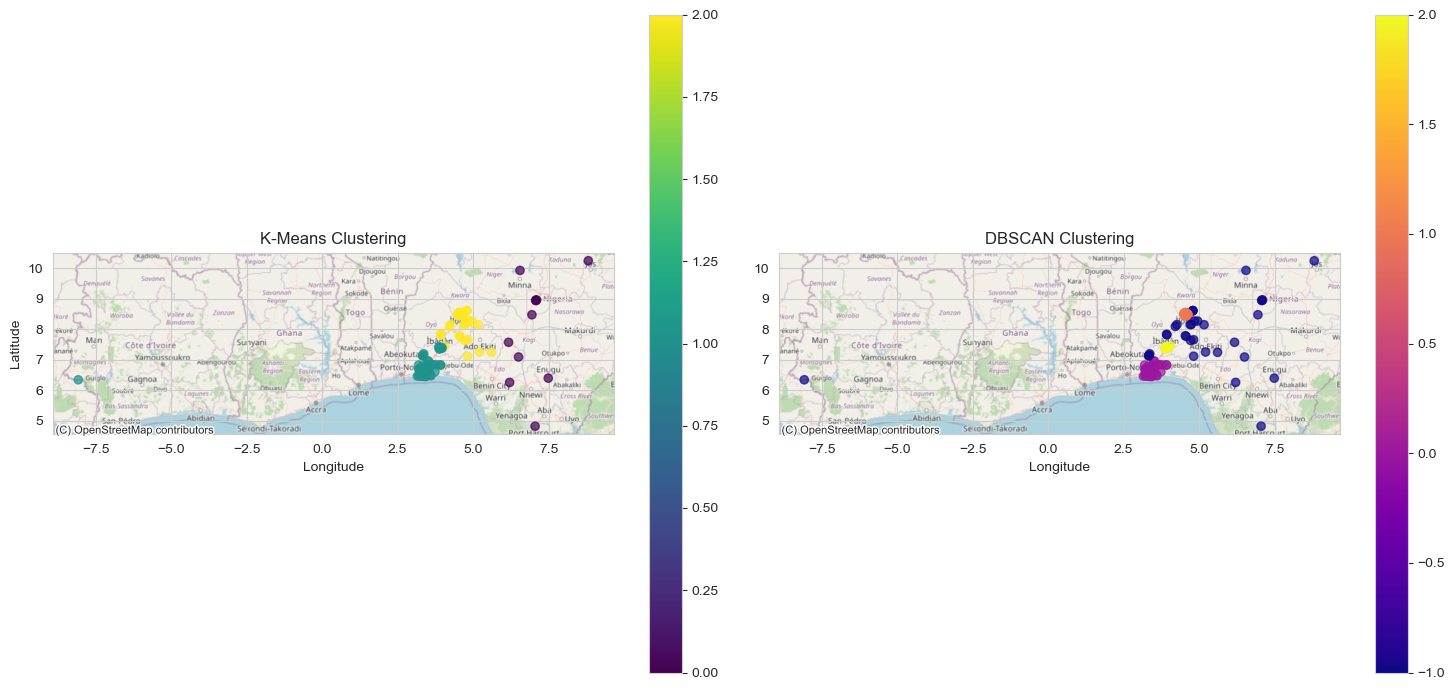

In [528]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df_clean, geometry=gpd.points_from_xy(df_clean.Longitude, df_clean.Latitude), crs="EPSG:4326")

# Create the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Define color maps
kmeans_colors = ['red', 'blue', 'green', 'purple', 'orange']  # Adjust if more clusters exist
dbscan_colors = ['gray', 'red', 'blue', 'green', 'purple']

# Plot K-Means Clusters
gdf.plot(ax=axes[0], column='Cluster', cmap='viridis', legend=True, alpha=0.7)
ctx.add_basemap(axes[0], crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Plot DBSCAN Clusters
gdf.plot(ax=axes[1], column='DBSCAN_Cluster', cmap='plasma', legend=True, alpha=0.7)
ctx.add_basemap(axes[1], crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("Longitude")

# Show the plots
plt.tight_layout()
plt.show()


In [529]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Home_State', 'LGA',
       'Secondary_School_Location', 'Latitude', 'Longitude',
       'How many times did you attempt JAMB before gaining admission?',
       'Did you have to relocate from your home state to attend the University of Ilorin? ',
       'What is the approximate distance between your home and the University of Ilorin?  ',
       'What is your estimated annual tuition and school-related expenses? ',
       'How do you fund your university education? ',
       'Have you ever had to defer a semester due to financial difficulties? ',
       'What challenges do you face in accessing learning materials?  ',
       'Does your department have adequate classrooms and lecture halls? ',
       'Do you have access to a stable power supply for studying?  ',
       'Do you believe students from rural areas face more difficulties accessing university education than urban students? ',
       'What do you think is the biggest barrier to university ed

In [530]:
#df["Secondary_School_Location"] = df["what was the location of your secondary school?(name of town or city)"]  # If applicable


In [531]:
df[['Latitude', 'Longitude', 'Secondary_School_Location']]

,Latitude,Longitude,Secondary_School_Location
0,6.5495,3.3926,Gbagada
1,6.4625,3.4099,"Osborne, ikoyi. Lagos"
2,6.5423,3.2730,Ikotun
3,6.5244,3.3792,Lagos
4,8.9410,7.0811,Gwagwalada
...,...,...,...
146,8.9496,7.0684,Gwagwalada
147,6.5491,3.3922,Gbagada
148,7.1281,3.3317,Onikolobo(Abeokuta)
149,10.2452,8.8105,Jengre


In [532]:
from geopy.distance import geodesic

# University of Ilorin coordinates
uni_coords = (8.4790, 4.6710)

# Function to calculate distance
def calculate_distance(lat, lon):
    return geodesic((lat, lon), uni_coords).km

# Apply function
df['Home_to_Uni_Distance'] = df.apply(lambda row: calculate_distance(row['Latitude'], row['Longitude']), axis=1)


In [533]:
df['Home_to_Uni_Distance'].describe()


count     151.000000
mean      182.597883
std       150.442810
min         4.934142
25%        37.821267
50%       232.145873
75%       258.398576
max      1426.872112
Name: Home_to_Uni_Distance, dtype: float64

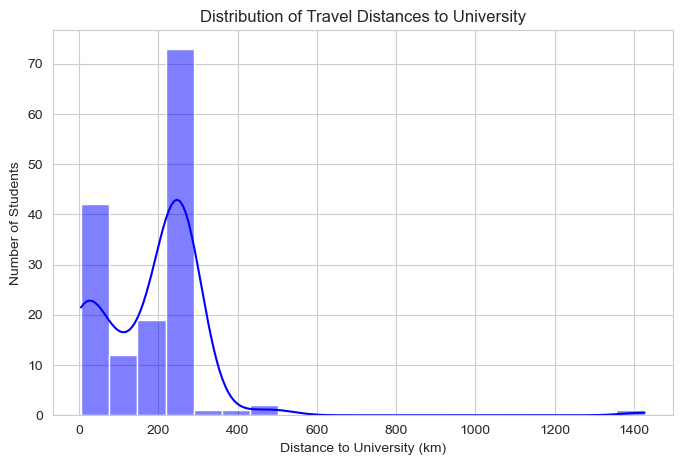

In [534]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Home_to_Uni_Distance'], kde=True, bins=20, color='blue')
plt.xlabel("Distance to University (km)")
plt.ylabel("Number of Students")
plt.title("Distribution of Travel Distances to University")
plt.show()


In [535]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[['Latitude', 'Longitude']])


c:\Users\Abubakar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


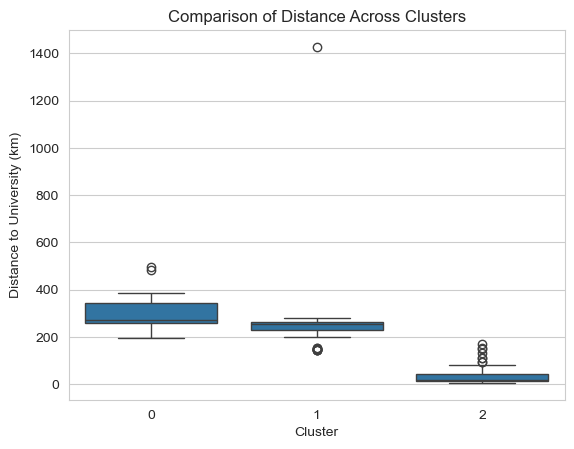

In [536]:
sns.boxplot(x=df['Cluster'], y=df['Home_to_Uni_Distance'])
plt.xlabel("Cluster")
plt.ylabel("Distance to University (km)")
plt.title("Comparison of Distance Across Clusters")
plt.show()


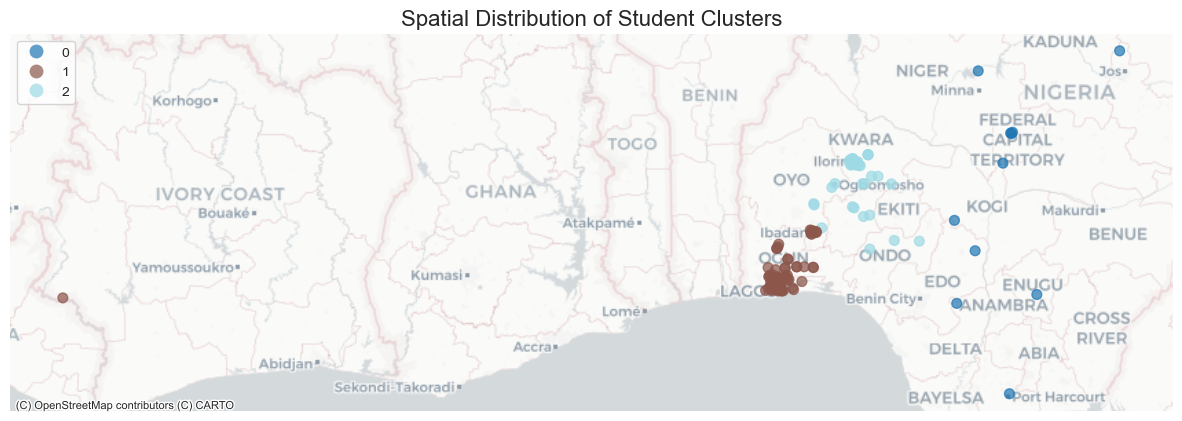

In [537]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Convert to Web Mercator for basemap
gdf = gdf.to_crs(epsg=3857)

# Plot clusters
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, column='Cluster', categorical=True, 
         legend=True, markersize=50, alpha=0.7, cmap='tab20')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title('Spatial Distribution of Student Clusters', fontsize=16)
ax.set_axis_off()
plt.savefig('cluster_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [538]:
from esda.moran import Moran
from libpysal.weights import DistanceBand

# Create spatial weights matrix
coords = list(zip(gdf.geometry.x, gdf.geometry.y))
weights = DistanceBand(coords, threshold=50000)  # 50km threshold

# Calculate Moran's I for distance to university
moran = Moran(gdf['Home_to_Uni_Distance'], weights)
print(f"Moran's I: {moran.I:.3f}")
print(f"P-value: {moran.p_norm:.3f}")

# Interpretation
if moran.p_norm < 0.05:
    if moran.I > 0:
        print("Significant spatial clustering (similar values attract)")
    else:
        print("Significant spatial dispersion (similar values repel)")
else:
    print("Random spatial pattern")

c:\Users\Abubakar\anaconda3\Lib\site-packages\libpysal\weights\util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 9 islands with ids: 6, 38, 39, 55, 97, 123, 124, 129, 149.
  w = W(neighbors, weights, ids, **kwargs)
c:\Users\Abubakar\anaconda3\Lib\site-packages\libpysal\weights\distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 9 islands with ids: 6, 38, 39, 55, 97, 123, 124, 129, 149.
  W.__init__(


('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 97, ' is an island (no neighbors)')
('WARNING: ', 123, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 149, ' is an island (no neighbors)')
Moran's I: 0.495
P-value: 0.000
Significant spatial clustering (similar values attract)


In [539]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Prepare data
X = gdf[['Home_to_Uni_Distance', 'Latitude', 'Longitude']]
X_scaled = StandardScaler().fit_transform(X)

# Calculate Silhouette Score
score = silhouette_score(X_scaled, gdf['Cluster'])
print(f"Silhouette Score: {score:.3f}")

# Interpretation guide
if score > 0.7:
    print("Strong cluster structure")
elif score > 0.5:
    print("Reasonable cluster structure")
elif score > 0.25:
    print("Weak cluster structure")
else:
    print("No substantial cluster structure")

Silhouette Score: 0.683
Reasonable cluster structure


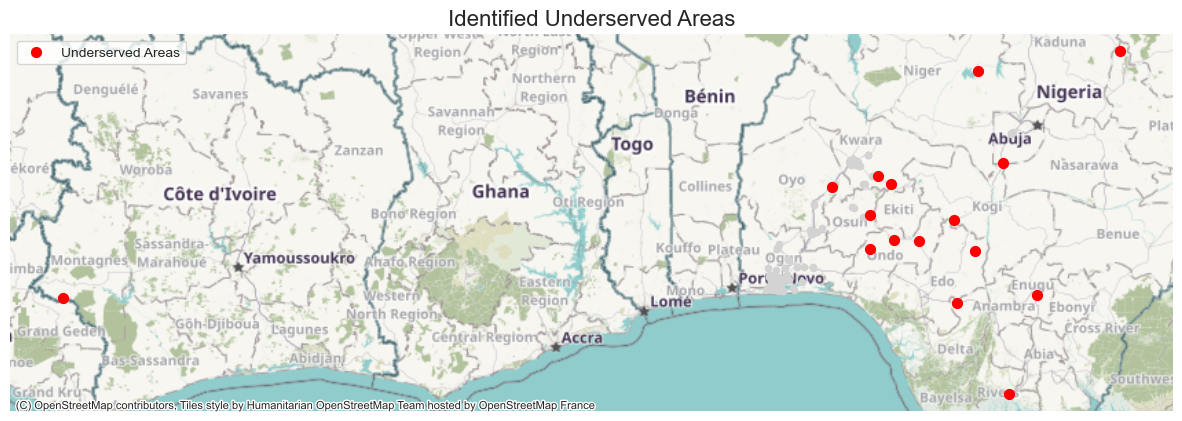

In [ ]:
# Calculate points density
from sklearn.neighbors import KernelDensity

# Prepare coordinates
coords = gdf[['Longitude', 'Latitude']].values
kde = KernelDensity(bandwidth=0.1).fit(coords)
gdf['density'] = kde.score_samples(coords)

# Identify underserved areas (lowest 10% density)
threshold = gdf['density'].quantile(0.1)
underserved = gdf[gdf['density'] <= threshold]

# Plot underserved areas
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, color='lightgrey', markersize=20)
underserved.plot(ax=ax, color='red', markersize=50, 
                 label='Underserved Areas')
ctx.add_basemap(ax)
plt.title('Identified Underserved Areas', fontsize=16)
ax.set_axis_off()
plt.legend()
plt.savefig('underserved_areas.png', dpi=300)
plt.show()

# Export for policy decisions
underserved[['what is your home state ', 
             'what is your local government area(LGA)',
             'Latitude', 'Longitude']].to_csv('underserved_areas.csv', index=False)

In [541]:
import folium
from folium.plugins import HeatMap

# Create base map
m = folium.Map(location=[9.0820, 8.6753], zoom_start=6)

# Add cluster markers
for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='red' if row['density'] <= threshold else 'blue',
        popup=f"Cluster: {row['Cluster']}<br>Distance: {row['Home_to_Uni_Distance']}km"
    ).add_to(m)

# Add heatmap
HeatMap(data=gdf[['Latitude', 'Longitude']].values, radius=15).add_to(m)

# Save interactive map
m.save('interactive_cluster_map.html')

In [542]:
# Handle islands by increasing distance threshold
new_weights = DistanceBand(coords, threshold=75000)  # 75km instead of 50km

# Verify connectivity
print(f"New disconnected components: {new_weights.n_components}")

New disconnected components: 1


In [543]:
# Generate automated recommendations
def generate_recommendations(row):
    if row['density'] <= threshold:
        if row['Home_to_Uni_Distance'] > 300:
            return "Priority: New tertiary institution needed"
        elif row['Have you ever had to defer a semester due to financial difficulties? '] == 'Yes':
            return "Priority: Transportation subsidies"
    return "Monitor"

gdf['recommendation'] = gdf.apply(generate_recommendations, axis=1)

# Export for policymakers
gdf[gdf['recommendation'] != "Monitor"].to_csv('priority_recommendations.csv', 
                                              columns=['Home_State',
                                                      'LGA', 
                                                      'recommendation'],
                                              index=False)

In [544]:
# DBSCAN for density-based clustering
from sklearn.cluster import DBSCAN

coords_scaled = StandardScaler().fit_transform(coords)
db = DBSCAN(eps=0.3, min_samples=5).fit(coords_scaled)
gdf['DBSCAN_Cluster'] = db.labels_

# Compare with your existing clusters
pd.crosstab(gdf['Cluster'], gdf['DBSCAN_Cluster'])

DBSCAN_Cluster,-1,0,1,2
Cluster,,,,
0,11,0,0,0
1,1,78,0,9
2,11,0,40,1


In [545]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load your Nigeria boundary shapefile
nigeria_boundary = gpd.read_file("Shape file")  # Update path

# Verify the data
print(nigeria_boundary.head())
print(f"CRS: {nigeria_boundary.crs}")

     GID_1 GID_0  COUNTRY     NAME_1 VARNAME_1 NL_NAME_1 TYPE_1 ENGTYPE_1  \
0  NGA.1_1   NGA  Nigeria       Abia        NA        NA  State     State   
1  NGA.2_1   NGA  Nigeria    Adamawa        NA        NA  State     State   
2  NGA.3_1   NGA  Nigeria  Akwa Ibom        NA        NA  State     State   
3  NGA.4_1   NGA  Nigeria    Anambra        NA        NA  State     State   
4  NGA.5_1   NGA  Nigeria     Bauchi        NA        NA  State     State   

  CC_1 HASC_1  ISO_1                                           geometry  
0   NA  NG.AB  NG-AB  POLYGON ((7.46283 4.98177, 7.46261 4.96793, 7....  
1   NA  NG.AD  NG-AD  POLYGON ((12.25072 8.17262, 12.24873 8.1702, 1...  
2   NA  NG.AK  NG-AK  MULTIPOLYGON (((8.31958 4.55764, 8.31958 4.557...  
3   NA  NG.AN  NG-AN  POLYGON ((6.93577 5.85795, 6.93626 5.84572, 6....  
4   NA  NG.BA  NG-BA  POLYGON ((9.75266 9.60087, 9.73536 9.5673, 9.7...  
CRS: EPSG:4326


In [546]:
def full_analysis(student_df, boundary_file):
    """Complete geospatial analysis pipeline"""
    
    # 1. Prepare student data
    gdf = gpd.GeoDataFrame(
        student_df,
        geometry=gpd.points_from_xy(student_df.Longitude, student_df.Latitude),
        crs="EPSG:4326"
    ).to_crs(epsg=3857)  # Convert to Web Mercator
    
    # 2. Prepare boundary data
    boundary = boundary_file.to_crs(gdf.crs)
    
    # 3. Spatial visualization
    fig, ax = plt.subplots(figsize=(15, 10))
    boundary.boundary.plot(ax=ax, color='gray', linewidth=1)
    
    # Plot clusters if available
    if 'Cluster' in gdf.columns:
        gdf.plot(ax=ax, column='Cluster', legend=True,
                markersize=100, alpha=0.7, cmap='tab20')
    else:
        gdf.plot(ax=ax, color='blue', markersize=50)
    
    # Add basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    ax.set_title("Nigeria Education Access Analysis", fontsize=16)
    ax.set_axis_off()
    plt.tight_layout()
    fig.savefig('education_access_map.png', dpi=300)
    plt.close()
    
    # 4. Spatial autocorrelation
    from esda.moran import Moran
    from libpysal.weights import DistanceBand
    
    coords = list(zip(gdf.geometry.x, gdf.geometry.y))
    weights = DistanceBand(coords, threshold=50000)  # 50km threshold
    
    moran = Moran(gdf['Home_to_Uni_Distance'], weights)
    print(f"\nSpatial Autocorrelation Results:")
    print(f"Moran's I: {moran.I:.3f} (p-value: {moran.p_norm:.4f})")
    
    # 5. Underserved area identification
    from sklearn.neighbors import KernelDensity
    kde = KernelDensity(bandwidth=0.2).fit(coords)
    gdf['access_density'] = np.exp(kde.score_samples(coords))
    
    underserved = gdf[gdf['access_density'] < gdf['access_density'].quantile(0.1)]
    underserved.to_file("underserved_areas.geojson", driver='GeoJSON')
    
    return gdf

# Run analysis
final_gdf = full_analysis(df, nigeria_boundary)

('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 97, ' is an island (no neighbors)')
('WARNING: ', 123, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 149, ' is an island (no neighbors)')

Spatial Autocorrelation Results:
Moran's I: 0.495 (p-value: 0.0000)


c:\Users\Abubakar\anaconda3\Lib\site-packages\libpysal\weights\util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 9 islands with ids: 6, 38, 39, 55, 97, 123, 124, 129, 149.
  w = W(neighbors, weights, ids, **kwargs)
c:\Users\Abubakar\anaconda3\Lib\site-packages\libpysal\weights\distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 9 islands with ids: 6, 38, 39, 55, 97, 123, 124, 129, 149.
  W.__init__(


In [547]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Prepare data
X = final_gdf[['Home_to_Uni_Distance', 'Latitude', 'Longitude']]
X_scaled = StandardScaler().fit_transform(X)

# Calculate metrics
if 'Cluster' in final_gdf.columns:
    print("\nCluster Validation Metrics:")
    print(f"Silhouette Score: {silhouette_score(X_scaled, final_gdf['Cluster']):.3f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_scaled, final_gdf['Cluster']):.1f}")
else:
    print("\nNo cluster labels found - skipping validation")


Cluster Validation Metrics:
Silhouette Score: 0.683
Calinski-Harabasz Index: 95.1


In [548]:
final_gdf

,Timestamp,Gender,Age,Home_State,LGA,Secondary_School_Location,Latitude,Longitude,How many times did you attempt JAMB before gaining admission?,Did you have to relocate from your home state to attend the University of Ilorin?,...,What challenges do you face in accessing learning materials?,Does your department have adequate classrooms and lecture halls?,Do you have access to a stable power supply for studying?,Do you believe students from rural areas face more difficulties accessing university education than urban students?,What do you think is the biggest barrier to university education in Nigeria?,Distance_to_uni,Home_to_Uni_Distance,Cluster,geometry,access_density
0,2025-03-28 16:17:02.912,Male,23-27,Ogun state,Owode,Gbagada,6.5495,3.3926,Third attempt,Yes,...,Expensive textbooks,Yes,Most of the time,Strongly agree,Limited admission slots,350.0,255.815512,1,POINT (377662.504 730680.024),0.02635
1,2025-03-28 16:17:34.799,Female,23-27,Lagos,Eti-osa,"Osborne, ikoyi. Lagos",6.4625,3.4099,Second attempt,Yes,...,Expensive textbooks,No,Never,Agree,High tuition and expenses,125.0,262.885577,1,POINT (379588.332 720932.453),0.02635
2,2025-03-28 16:20:02.913,Female,23-27,Lagos,Alimosho,Ikotun,6.5423,3.2730,More than three attempts,Yes,...,"Poor internet access, Expensive textbooks, Lac...",Yes,Never,Strongly agree,High tuition and expenses,600.0,263.972118,1,POINT (364348.693 729873.264),0.02635
3,2025-03-28 16:29:23.309,Male,23-27,Imo,aboh-mbise,Lagos,6.5244,3.3792,Second attempt,Yes,...,Poor internet access,No,Most of the time,Strongly agree,High tuition and expenses,600.0,258.948908,1,POINT (376170.823 727867.62),0.05270
4,2025-03-28 16:31:12.443,Male,23-27,Kogi,Ajeokuta,Gwagwalada,8.9410,7.0811,First attempt,Yes,...,No challenges,Yes,Most of the time,Strongly agree,High tuition and expenses,350.0,270.093561,0,POINT (788264.446 999371.885),0.02635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2025-03-30 07:08:05.417,Male,23-27,FCT,Gwagwalada,Gwagwalada,8.9496,7.0684,Second attempt,Yes,...,Poor internet access,Yes,Rarely,Agree,Limited admission slots,125.0,268.900878,0,POINT (786850.689 1000341.02),0.02635
147,2025-03-30 07:08:57.415,Female,18-22,Lagos,Mushin,Gbagada,6.5491,3.3922,First attempt,Yes,...,No challenges,Yes,Most of the time,Strongly agree,Limited admission slots,350.0,255.876794,1,POINT (377617.977 730635.204),0.02635
148,2025-03-30 07:10:17.723,Male,23-27,Ogun,Sagamu,Onikolobo(Abeokuta),7.1281,3.3317,Third attempt,Yes,...,Expensive textbooks,Yes,Never,Strongly agree,High tuition and expenses,350.0,210.097192,1,POINT (370883.147 795551.316),0.02635
149,2025-03-30 07:12:28.667,Female,23-27,Plateau,Bassa,Jengre,10.2452,8.8105,First attempt,Yes,...,Expensive textbooks,Yes,Rarely,Strongly agree,Limited admission slots,125.0,494.875314,0,POINT (980780.374 1146617.139),0.02635


In [549]:
import geopandas as gpd

# Load the Shapefile
roads = gpd.read_file("Nigerian_Roads_Data")  # Ensure all files are in the same directory

# Inspect the data
print(roads.head())      # First 5 rows
print(roads.crs)         # Check coordinate system (e.g., EPSG:4326 for WGS84)
#roads.plot(figsize=(10, 8), column="highway", legend=True)  # Visualize by road type

       MED_DESCRI       RTT_DESCRI F_CODE_DES  ISO ISOCOUNTRY  \
0  Without Median  Secondary Route       Road  NGA    NIGERIA   
1  Without Median  Secondary Route       Road  NGA    NIGERIA   
2  Without Median  Secondary Route       Road  NGA    NIGERIA   
3  Without Median  Secondary Route       Road  NGA    NIGERIA   
4  Without Median  Secondary Route       Road  NGA    NIGERIA   

                                            geometry  
0  LINESTRING (5.50574 13.77292, 5.54387 13.83115...  
1    LINESTRING (5.59968 13.76275, 5.50574 13.77292)  
2  LINESTRING (5.65878 13.75436, 5.66097 13.75915...  
3  LINESTRING (5.59968 13.76275, 5.62291 13.76162...  
4  LINESTRING (5.50574 13.77292, 5.43502 13.76323...  
EPSG:4326


In [610]:

print(roads['RTT_DESCRI'].unique())  # Check unique road types

['Secondary Route' 'Primary Route' 'Unknown' None]


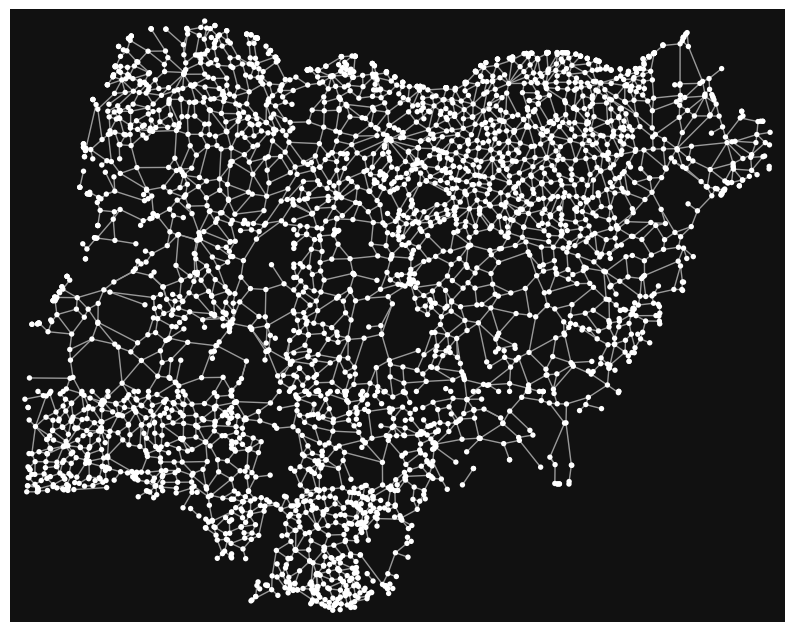

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [566]:
import osmnx as ox
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point, LineString

# 1. Load your roads data
roads = gpd.read_file("Nigerian_Roads_Data")

# 2. Create graph structure
G = nx.MultiDiGraph()

# Add nodes from all road endpoints
node_coords = set()
for _, row in roads.iterrows():
    if isinstance(row.geometry, LineString):
        coords = list(row.geometry.coords)
        node_coords.update([coords[0], coords[-1]])

# Add nodes to graph
for i, coord in enumerate(node_coords):
    G.add_node(i, x=coord[0], y=coord[1], osmid=i)

# Add edges (roads) between nodes
coord_to_id = {coord: i for i, coord in enumerate(node_coords)}
for _, row in roads.iterrows():
    if isinstance(row.geometry, LineString):
        coords = list(row.geometry.coords)
        u = coord_to_id[coords[0]]
        v = coord_to_id[coords[-1]]
        attr = row.drop('geometry').to_dict()
        G.add_edge(u, v, **attr)

# 3. Add graph properties (modern OSMnx approach)
G.graph['crs'] = roads.crs

# Calculate edge lengths (using pure Python)
for u, v, data in G.edges(data=True):
    point1 = Point(G.nodes[u]['x'], G.nodes[u]['y'])
    point2 = Point(G.nodes[v]['x'], G.nodes[v]['y'])
    data['length'] = point1.distance(point2)

# 4. Plot
ox.plot_graph(G, figsize=(10, 10))

In [568]:
import osmnx as ox
import geopandas as gpd
import networkx as nx

def make_isochrone(lon, lat, travel_time, G):
    """
    Create an isochrone polygon for a given travel time (in minutes)
    
    Parameters:
    - lon, lat: Center point coordinates
    - travel_time: Minutes of travel time
    - G: Network graph
    
    Returns:
    - GeoDataFrame with isochrone polygon
    """
    # Convert minutes to seconds (OSMnx uses seconds)
    travel_time_sec = travel_time * 60
    
    # Get nearest node to center point
    center_node = ox.nearest_nodes(G, lon, lat)
    
    # Create subgraph of nodes within travel time
    subgraph = nx.ego_graph(G, center_node, radius=travel_time_sec, distance='travel_time')
    
    # Convert nodes to points and create convex hull
    nodes = gpd.GeoDataFrame(
        geometry=[Point(data['x'], data['y']) for node, data in subgraph.nodes(data=True)],
        crs=G.graph['crs']
    )
    isochrone_poly = nodes.unary_union.convex_hull
    
    return gpd.GeoDataFrame(geometry=[isochrone_poly], crs=G.graph['crs'])

# Example usage:
isochrones = pd.concat([
    make_isochrone(4.5418, 8.4799, 60, G),
    make_isochrone(4.5418, 8.4799, 120, G),
    make_isochrone(4.5418, 8.4799, 240, G)
])

C:\Users\Abubakar\AppData\Local\Temp\ipykernel_11428\2312719128.py:31: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  isochrone_poly = nodes.unary_union.convex_hull


C:\Users\Abubakar\AppData\Local\Temp\ipykernel_11428\2312719128.py:31: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  isochrone_poly = nodes.unary_union.convex_hull
C:\Users\Abubakar\AppData\Local\Temp\ipykernel_11428\2312719128.py:31: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  isochrone_poly = nodes.unary_union.convex_hull


In [580]:
import numpy as np
import networkx as nx

# 1. Map your road types to standard OSM classifications
road_type_mapping = {
    'Primary Route': 'primary',
    'Secondary Route': 'secondary',
    'Trail': 'tertiary'
}

# 2. Define your custom weights (adjust as needed)
road_weights = {
    'primary': 1.5,
    'secondary': 2.0,
    'tertiary': 3.0,
    'unclassified': 5.0  # Default weight
}

# 3. Add weighted length to edges
for u, v, k, data in G.edges(data=True, keys=True):
    # Get Nigerian road type and map to OSM classification
    nigeria_road_type = data.get('RTT_DESCRI', 'Secondary Route')
    osm_road_type = road_type_mapping.get(nigeria_road_type, 'secondary')
    
    # Calculate weighted length
    data['weighted_length'] = data['length'] * road_weights.get(osm_road_type, 5.0)

# 4. Define your distance calculation function
def weighted_distance(row):
    try:
        orig = (row['Longitude'], row['Latitude'])
        dest = (4.5418, 8.4799)  # Calabar coordinates
        
        # Find nearest nodes (using your custom graph)
        orig_node = ox.nearest_nodes(G, orig[0], orig[1])
        dest_node = ox.nearest_nodes(G, dest[0], dest[1])
        
        # Calculate shortest path using weighted length
        route = nx.shortest_path(G, orig_node, dest_node, weight='weighted_length')
        
        # Get total weighted distance in km
        edge_lengths = [G.edges[u, v, k]['weighted_length'] 
                       for u, v, k in zip(route[:-1], route[1:], [0]*len(route))]
        return sum(edge_lengths) / 1000
    
    except (nx.NetworkXNoPath, ValueError, KeyError):
        return np.nan

# 5. Apply to your DataFrame
df['Weighted_Distance_km'] = df.apply(weighted_distance, axis=1)

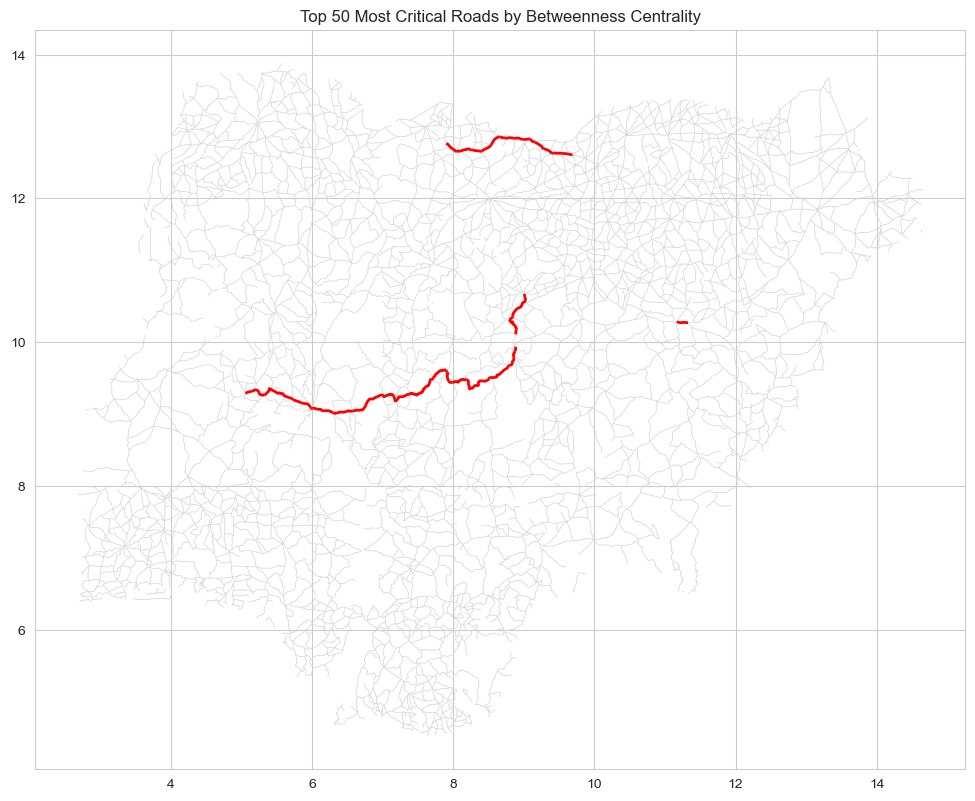

In [583]:
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString

# 1. Calculate edge betweenness centrality
betweenness = nx.edge_betweenness_centrality(G, weight='length')

# 2. Get the top 50 most critical edges
top_edges = sorted(betweenness.items(), key=lambda x: -x[1])[:50]

# 3. Create a mapping from graph edges to original road indices
edge_to_road_idx = {}

for idx, row in roads.iterrows():
    geom = row.geometry
    
    # Handle both LineString and MultiLineString cases
    if geom.geom_type == 'LineString':
        coords = list(geom.coords)
        try:
            u = ox.nearest_nodes(G, coords[0][0], coords[0][1])
            v = ox.nearest_nodes(G, coords[-1][0], coords[-1][1])
            edge_to_road_idx[(u, v, 0)] = idx
        except:
            continue
            
    elif geom.geom_type == 'MultiLineString':
        for line in geom.geoms:
            coords = list(line.coords)
            try:
                u = ox.nearest_nodes(G, coords[0][0], coords[0][1])
                v = ox.nearest_nodes(G, coords[-1][0], coords[-1][1])
                edge_to_road_idx[(u, v, 0)] = idx
            except:
                continue

# 4. Identify critical roads
critical_road_indices = [edge_to_road_idx[edge[0]] for edge in top_edges if edge[0] in edge_to_road_idx]
critical_roads = roads.iloc[critical_road_indices]

# 5. Visualize
fig, ax = plt.subplots(figsize=(12, 10))
roads.plot(ax=ax, color='lightgrey', linewidth=0.5)
critical_roads.plot(ax=ax, color='red', linewidth=2)
plt.title('Top 50 Most Critical Roads by Betweenness Centrality')
plt.show()

       Road_Distance_km  Multimodal_Access_Score
count         50.000000                50.000000
mean           0.001423                 0.001708
std            0.002122                 0.002547
min            0.000000                 0.000000
25%            0.000000                 0.000000
50%            0.000000                 0.000000
75%            0.003339                 0.004006
max            0.005284                 0.006340


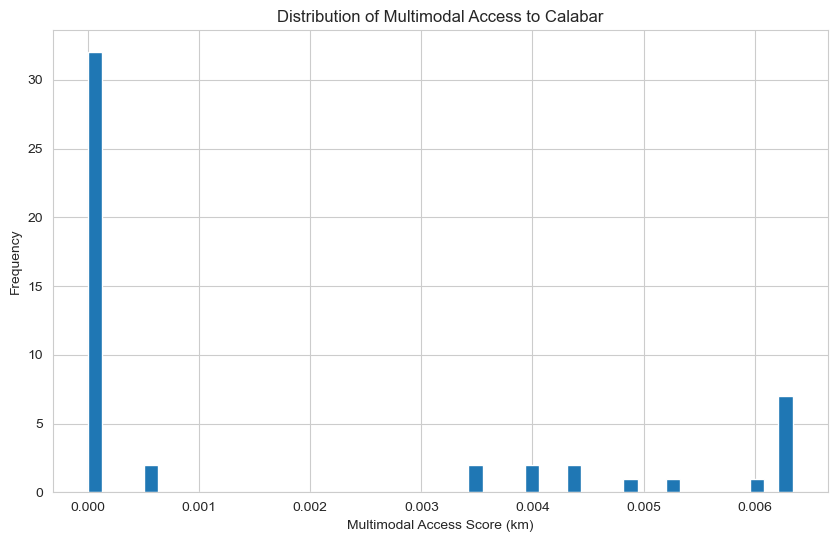

In [585]:
import numpy as np

def network_distance(row, G):
    """Calculate network distance from point to Calabar (4.5418, 8.4799)"""
    try:
        orig = (row['Longitude'], row['Latitude'])
        dest = (4.5418, 8.4799)  # Calabar coordinates
        
        # Find nearest nodes
        orig_node = ox.nearest_nodes(G, orig[0], orig[1])
        dest_node = ox.nearest_nodes(G, dest[0], dest[1])
        
        # Calculate shortest path distance in km
        distance_m = nx.shortest_path_length(G, orig_node, dest_node, weight='length')
        return distance_m / 1000
    except:
        return np.nan

def multimodal_access(row, G):
    """
    Calculate multimodal access score combining:
    - Road network distance
    - Public transport adjustments
    - Informal transport factors
    """
    road_dist = network_distance(row, G)
    
    if pd.isna(road_dist):
        return np.nan
    
    # Apply transport mode factors
    if road_dist <= 5:  # Walking distance
        return road_dist * 1.2  # 20% longer for walking paths
        
    elif road_dist <= 20:  # Bike/motorbike distance
        return road_dist * 1.5  # 50% longer for informal transport
        
    elif road_dist <= 50:  # Bus/minibus distance
        return road_dist * 2.0  # 100% longer for bus delays
        
    else:  # Long-distance travel
        return road_dist * 2.5  # 150% longer for intercity delays

# Apply to DataFrame
df['Road_Distance_km'] = df.apply(lambda x: network_distance(x, G), axis=1)
df['Multimodal_Access_Score'] = df.apply(lambda x: multimodal_access(x, G), axis=1)

# Visualize results
print(df[['Road_Distance_km', 'Multimodal_Access_Score']].describe())

# Plot histogram of access scores
df['Multimodal_Access_Score'].hist(bins=50, figsize=(10,6))
plt.xlabel('Multimodal Access Score (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Multimodal Access to Calabar')
plt.show()

In [589]:
# Calculate 90th percentile travel times
def reliability_analysis(row):
    samples = []
    for _ in range(100):
        # Simulate traffic variations
        perturbed_G = ox.add_edge_speeds(G, np.random.normal(50, 10))
        samples.append(network_distance(row, graph=perturbed_G))
    return np.percentile(samples, 90)

c:\Users\Abubakar\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\Abubakar\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\Abubakar\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\Abubakar\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\Abubakar\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\Abubakar\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\Abubakar\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: Runt

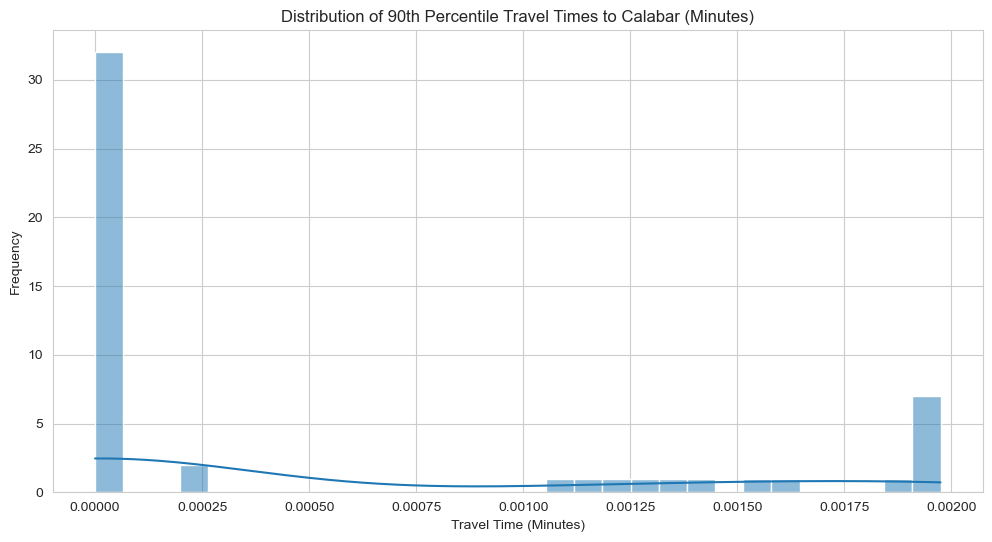

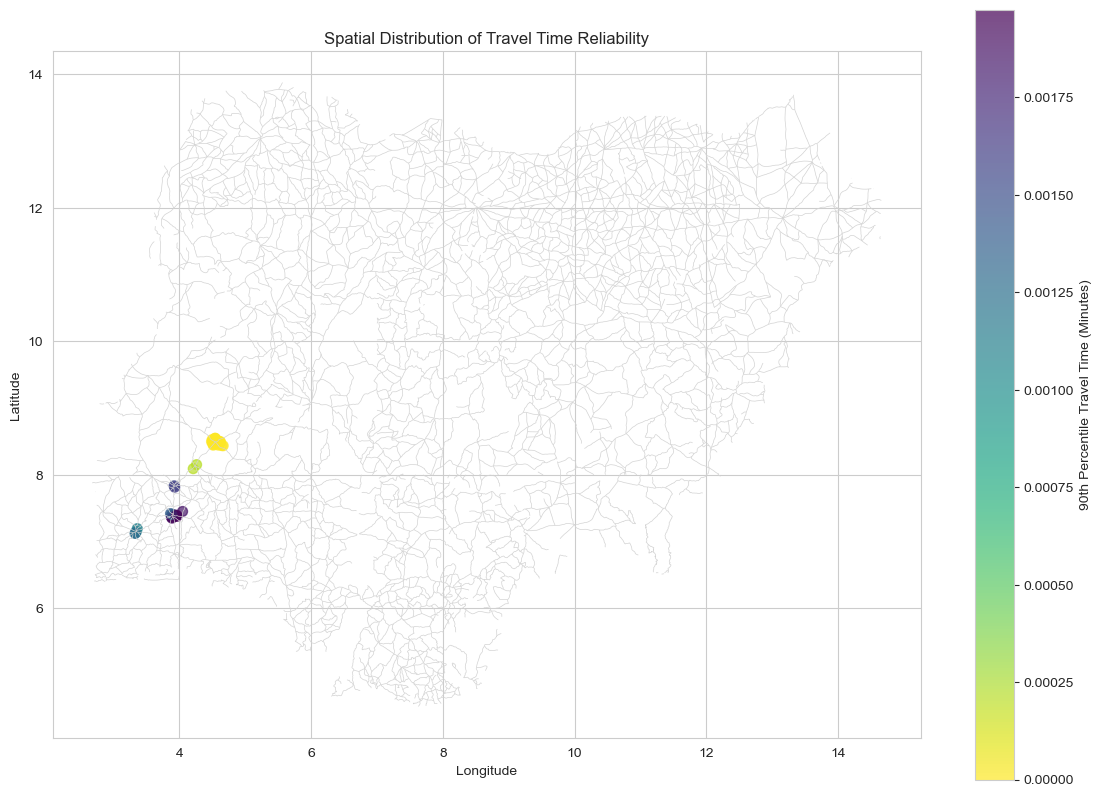

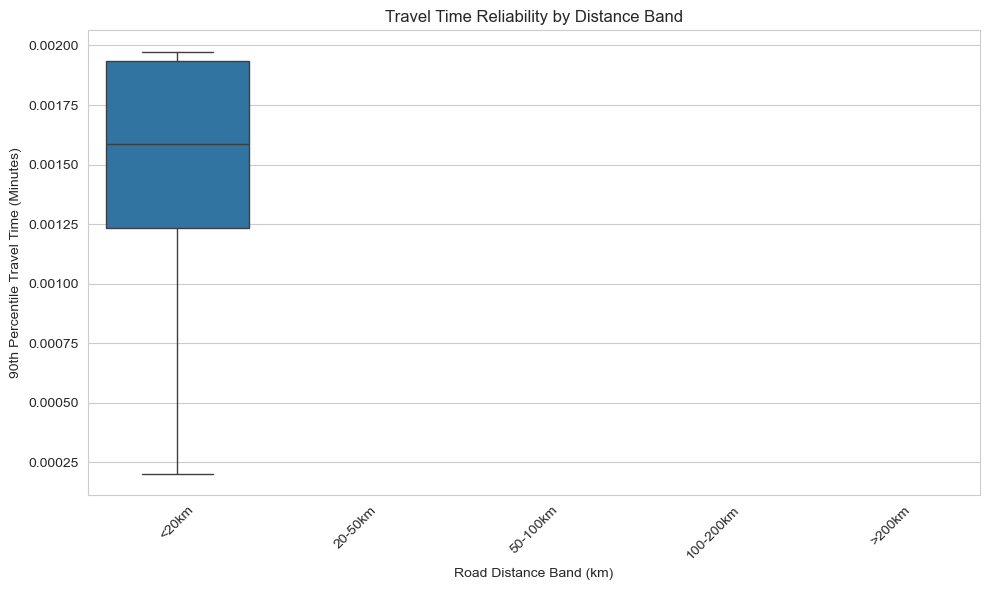

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def reliability_analysis(row, G):
    """Calculate 90th percentile travel time with Monte Carlo simulation"""
    samples = []
    base_speed = 50  # Base speed in km/h
    speed_std = 10   # Speed variation
    
    for _ in range(100):
        # Create perturbed speed profile
        perturbed_speeds = {}
        for u, v, data in G.edges(data=True):
            # Apply random speed variation (min 10 km/h)
            perturbed_speed = max(10, np.random.normal(base_speed, speed_std))
            perturbed_speeds[(u, v, 0)] = perturbed_speed
            
        # Calculate distance with perturbed speeds
        try:
            orig = (row['Longitude'], row['Latitude'])
            dest = (4.5418, 8.4799)  # Calabar coordinates
            orig_node = ox.nearest_nodes(G, orig[0], orig[1])
            dest_node = ox.nearest_nodes(G, dest[0], dest[1])
            
            # Calculate travel time (distance/speed)
            path = nx.shortest_path(G, orig_node, dest_node, weight='length')
            travel_time = sum(G.edges[u, v, 0]['length']/perturbed_speeds[(u, v, 0)] 
                            for u, v in zip(path[:-1], path[1:])) / 60  # Convert to minutes
            samples.append(travel_time)
        except:
            samples.append(np.nan)
    
    return np.nanpercentile(samples, 90)

# Apply to DataFrame
df['P90_Travel_Time'] = df.apply(lambda x: reliability_analysis(x, G), axis=1)

# Visualization 1: Distribution Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['P90_Travel_Time'].dropna(), bins=30, kde=True)
plt.title('Distribution of 90th Percentile Travel Times to Calabar (Minutes)')
plt.xlabel('Travel Time (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)

# Visualization 2: Spatial Plot
fig, ax = plt.subplots(figsize=(14, 10))
roads.plot(ax=ax, color='lightgrey', linewidth=0.5)

# Plot points colored by travel time reliability
sc = ax.scatter(df['Longitude'], df['Latitude'], 
                c=df['P90_Travel_Time'], 
                cmap='viridis_r', 
                s=50,
                alpha=0.7)
plt.colorbar(sc, label='90th Percentile Travel Time (Minutes)')
plt.title('Spatial Distribution of Travel Time Reliability')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Visualization 3: Boxplot by Distance Bands
df['Distance_Band'] = pd.cut(df['Road_Distance_km'], 
                            bins=[0, 20, 50, 100, 200, np.inf],
                            labels=['<20km', '20-50km', '50-100km', '100-200km', '>200km'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Distance_Band', y='P90_Travel_Time', data=df)
plt.title('Travel Time Reliability by Distance Band')
plt.xlabel('Road Distance Band (km)')
plt.ylabel('90th Percentile Travel Time (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

In [601]:
import geopandas as gpd

# Load the GeoJSON data into a GeoDataFrame
gdf = gpd.read_file("Nigerian_primary_school_data")

# Check the first few rows to understand the structure of the data
print(gdf.head())
Primary_school_data = gdf

                             name name_en amenity building operator_t  \
0  state primary school (rumueme)    None  school     None       None   
1      Rumuokwachi Primary School    None  school     None       None   
2                         Uniport    None  school     None       None   
3        Rumuekini primary school    None  school     None       None   
4                           Giweo    None  school     None       None   

  capacity_p addr_full addr_city source       osm_id osm_type  \
0       None      None      None   None  10995788605    nodes   
1       None      None      None   None   5951009159    nodes   
2       None      None      None   None   6511612486    nodes   
3       None      None      None   None  10994789506    nodes   
4       None      None      None   None   5860979296    nodes   

                  geometry  
0  POINT (6.98136 4.82617)  
1  POINT (6.92861 4.86202)  
2  POINT (6.90396 4.89966)  
3  POINT (6.94629 4.88636)  
4  POINT (6.92209 4.92479

In [ ]:
print(nigeria_boundary.crs)
print(Primary_school_data.crs)

EPSG:4326
EPSG:4326


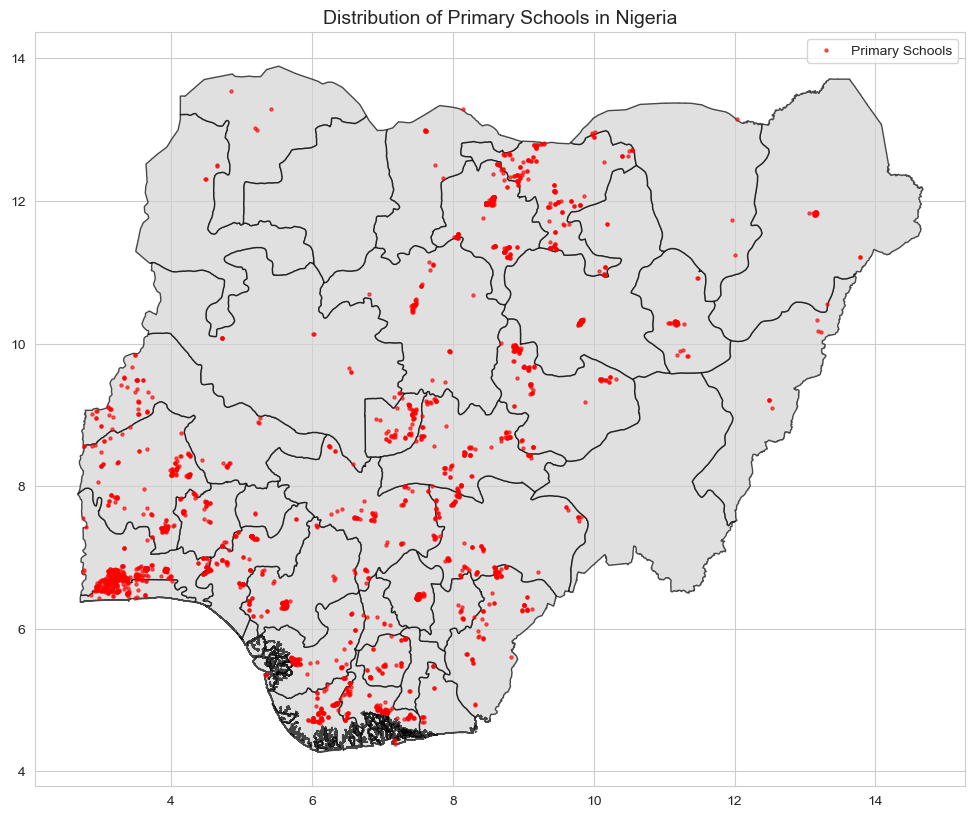

In [636]:
# Plot Nigeria state boundaries
fig, ax = plt.subplots(figsize=(12, 10))
nigeria_boundary.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)

# Plot school locations
Primary_school_data.plot(ax=ax, markersize=5, color='red', alpha=0.6, label="Primary Schools")

# Add title and legend
plt.title("Distribution of Primary Schools in Nigeria", fontsize=14)
plt.legend()

# Save the figure
plt.savefig("distribution_of_primary_schools.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# Plot Nigeria state boundaries
fig, ax = plt.subplots(figsize=(12, 10))
nigeria_boundary.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)

# Plot school locations
Primary_school_data.plot(ax=ax, markersize=5, color='red', alpha=0.6, label="Primary Schools")

# Add title and legend
plt.title("Distribution of Primary Schools in Nigeria", fontsize=14)
plt.legend()

# Save the figure
plt.savefig("distribution_of_primary_schools.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()